In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [60]:
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)

In [12]:
labels_true = y

Number of clusters: 2
Outliers : 10


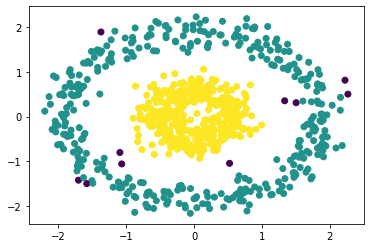

In [13]:
X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=10).fit_predict(X)


print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(X[:,0], X[:,1], c=y_pred)

In [5]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

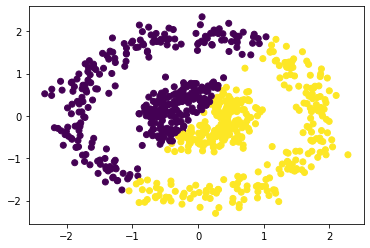

In [9]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans)

In [14]:
print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
print("V-measure: %0.3f" % metrics.v_measure_score(y, y_pred))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, y_pred))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, y_pred))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, y))

Homogeneity: 0.9937467254188095
Completeness: 0.9127480747650034
V-measure: 0.952
Adjusted Rand Index: 0.974
Adjusted Mutual Information: 0.951
Silhouette Coefficient: 0.198


In [19]:
from sklearn.neighbors import kneighbors_graph
import pandas as pd

In [69]:
A = kneighbors_graph(X, 3, mode='distance', include_self=True)

In [70]:
dist_df = pd.DataFrame(A.toarray())

In [71]:
dist_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
count,750.000000,750.0,750.000000,750.0,750.000000,750.0,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.0,750.000000,750.000000,750.000000,750.000000
mean,0.000025,0.0,0.000288,0.0,0.000036,0.0,0.000223,0.000096,0.000022,0.000012,...,0.000251,0.000097,0.000203,0.000073,0.000119,0.0,0.000039,0.000165,0.000028,0.000202
std,0.000695,0.0,0.004941,0.0,0.000814,0.0,0.004331,0.001859,0.000606,0.000338,...,0.004026,0.002109,0.003448,0.001432,0.002321,0.0,0.000795,0.004509,0.000548,0.003637
min,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,0.019030,0.0,0.113519,0.0,0.021531,0.0,0.091344,0.038362,0.016598,0.009268,...,0.074250,0.054876,0.078796,0.031401,0.049297,0.0,0.019167,0.123490,0.011177,0.088954


In [72]:
dist_val = sorted(dist_df.iloc[:,-1], reverse=True)

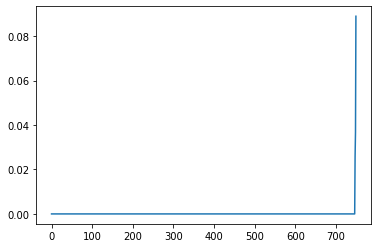

In [73]:
dist_df.iloc[:,-1].sort_values(ascending=True).reset_index().iloc[:,1].plot()

In [74]:
x_1= dist_df.iloc[:,-1].sort_values(ascending=True).reset_index().iloc[:,1]

In [75]:
import matplotlib.pyplot as plt

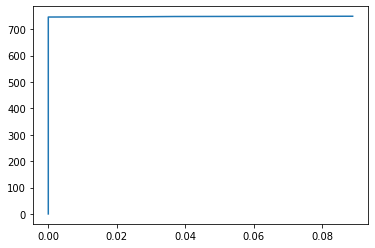

In [76]:
plt.plot(x_1, range(len(x_1)))